In [40]:
pip install PyWavelets

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pywt
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [42]:
def w2d(img, mode='haar', level=1):
    imArray = cv2.imread(img)
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  np.float32(imArray)   
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

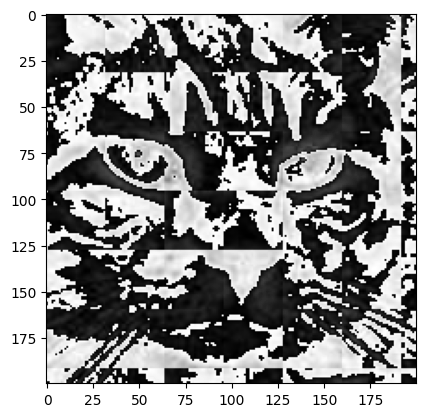

In [43]:
cropped_img='./cat_train/cat.1592.jpg'
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [44]:
names_to_num = {
    'cat_train':0,
    'dog_tain':1,
}

In [45]:
import os
X, y = [], []
c_list = os.listdir('./cat_train')
d_list = os.listdir('./dog_train')
for i in c_list:
    img = cv2.imread(f'./cat_train/{i}')
    img_har = w2d(f'./cat_train/{i}','db1',5)
    combined_img = np.vstack((img.reshape(200*200*3,1),img_har.reshape(200*200,1)))
    X.append(combined_img)
    y.append(0)
    
for i in d_list:
    img = cv2.imread(f'./dog_train/{i}')
    img_har = w2d(f'./dog_train/{i}','db1',5)
    combined_img = np.vstack((img.reshape(200*200*3,1),img_har.reshape(200*200,1)))
    X.append(combined_img)
    y.append(1)

In [46]:
len(c_list),len(2*c_list)

(335, 670)

In [47]:
len(X)

670

In [48]:
X[0]

array([[133],
       [148],
       [174],
       ...,
       [ 12],
       [  9],
       [  8]], dtype=uint8)

In [49]:
y[0]

0

In [50]:
X = np.array(X).reshape(len(X),200*200*3+200*200).astype(float)
X.shape

(670, 160000)

In [51]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [52]:
import pandas as pd
df1 = pd.DataFrame(X)
df2 = pd.DataFrame({'label':y})
df = pd.concat([df1,df2],axis=1)
df = df.sample(frac = 1)
X = df.drop('label',axis=1)
y= df.label

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9702380952380952

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pipe.predict(X_test))
cm

array([[84,  4],
       [ 1, 79]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

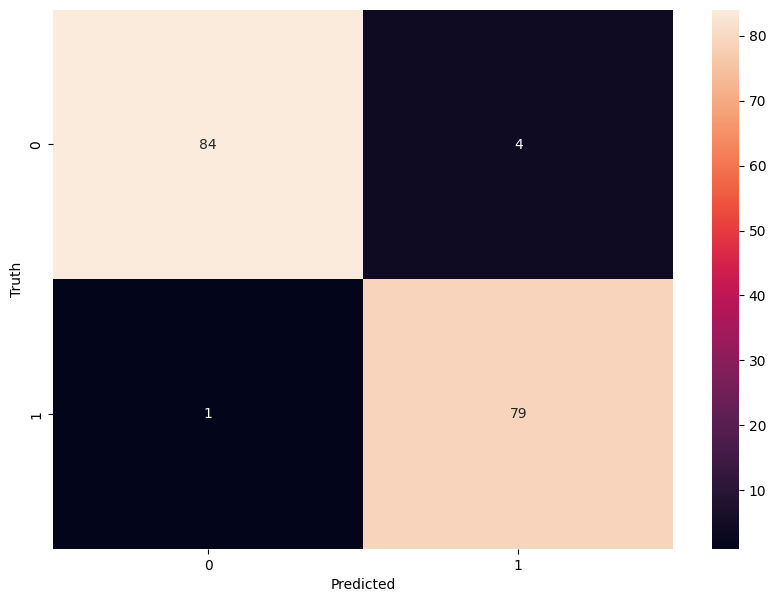

In [55]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
# Note:
# Cat - 0
# dog - 1

In [64]:
pipe.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [70]:
np.array(y_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [71]:
pipe.score(X_test, y_test)*100

97.02380952380952

In [76]:
!pip install joblib

In [77]:
from joblib import dump
dump(pipe,'model')

['model']